In [87]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
dfl = pd.read_csv('data/lectures.csv', delimiter = ',')
dfl.shape

(418, 4)

In [89]:
dfl.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [90]:
dfl.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [91]:
dfl.isna().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

In [92]:
dfl.duplicated().sum()

0

In [93]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [94]:
dfl[['type_of', 'part', 'lecture_id']].groupby(['type_of','part'], as_index = False).count().sort_values(by = ['type_of', 'part'])

,type_of,part,lecture_id
0,concept,1,20
1,concept,2,18
2,concept,3,7
3,concept,4,19
4,concept,5,72
5,concept,6,63
6,concept,7,23
7,intention,2,7
8,solving question,1,34
9,solving question,2,31


<AxesSubplot: xlabel='part', ylabel='tag'>

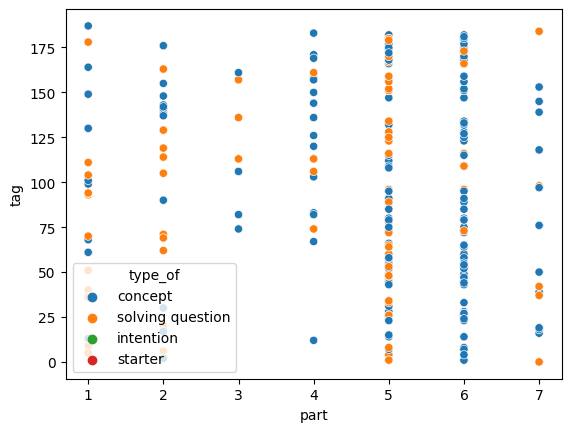

In [95]:
sns.scatterplot(data = dfl, x = 'part', y = 'tag', hue = 'type_of')

<AxesSubplot: xlabel='tag', ylabel='Count'>

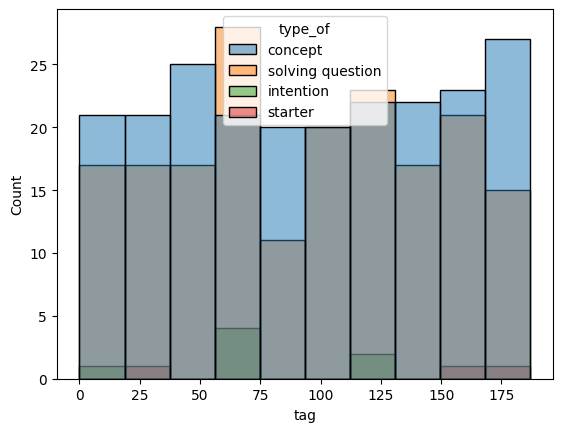

In [96]:
sns.histplot(data = dfl, x = 'tag', hue = 'type_of')

<AxesSubplot: xlabel='part', ylabel='Count'>

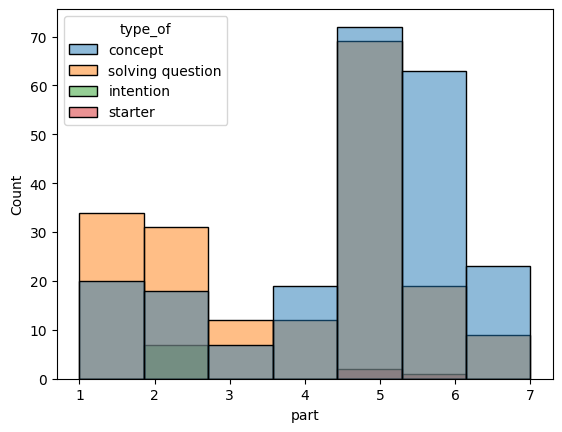

In [97]:
sns.histplot(data = dfl, x = 'part', hue = 'type_of', bins = 7)

In [98]:
dfq = pd.read_csv('data/questions.csv', delimiter = ',')
dfq.shape

(13523, 5)

In [99]:
dfq.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [100]:
dfq.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [101]:
dfq.isna().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [102]:
dfq[dfq.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [103]:
dfq.duplicated().sum()

0

In [104]:
dfq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [105]:
dfq[['part', 'question_id']].groupby(['part'], as_index = False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1212
6,7,1160


<AxesSubplot: xlabel='part', ylabel='Count'>

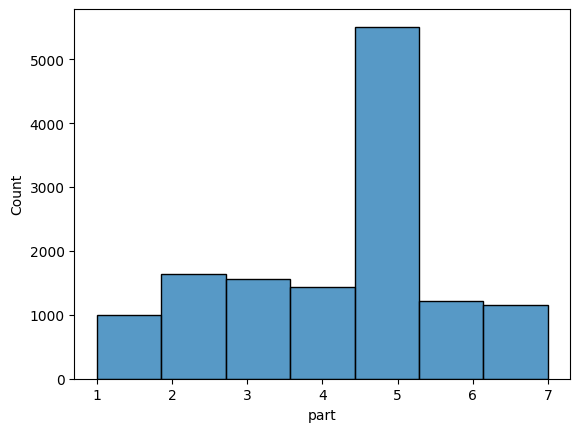

In [106]:
sns.histplot(data = dfq, x = 'part', bins = 7)

In [107]:
df = pd.read_csv('data/train.csv', delimiter = ',', nrows = 1500000)
df.shape

(1500000, 10)

In [108]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [109]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns += [column_name]
    else:
        num_columns += [column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов =', len(cat_columns))
print('Числовые данные:\t ', num_columns, '\n Число столблцов =', len(num_columns))

Категориальные данные:	  ['prior_question_had_explanation'] 
 Число столблцов = 1
Числовые данные:	  ['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time'] 
 Число столблцов = 9


In [110]:
df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.464333e+06
mean,7.499995e+05,7.164311e+09,1.554237e+07,5.204291e+03,1.994467e-02,8.004560e+02,1.375011e+00,6.195200e-01,2.535047e+04
std,4.330128e+05,1.053062e+10,9.233238e+06,3.882724e+03,1.398102e-01,1.030197e+03,1.194656e+00,5.249805e-01,1.956775e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,3.749998e+05,5.145690e+08,7.171715e+06,2.025000e+03,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,7.499995e+05,2.636763e+09,1.556872e+07,5.010000e+03,0.000000e+00,3.830000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,1.124999e+06,9.573303e+09,2.350614e+07,7.397000e+03,0.000000e+00,1.104000e+03,3.000000e+00,1.000000e+00,2.975000e+04
max,1.499999e+06,7.809200e+10,3.156632e+07,3.273600e+04,1.000000e+00,7.739000e+03,3.000000e+00,1.000000e+00,3.000000e+05


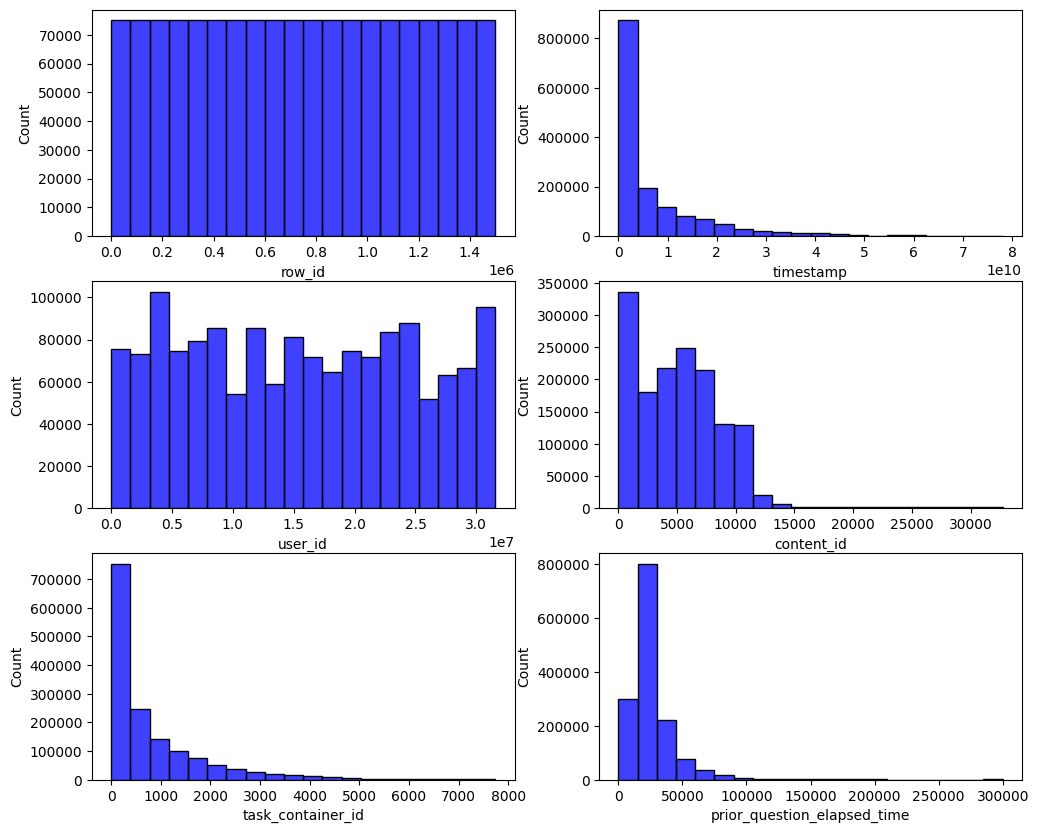

In [111]:
num_col_big = ['row_id', 'timestamp', 'user_id', 'content_id', 'task_container_id', 'prior_question_elapsed_time']
width = 2
height = int(np.ceil(len(num_col_big) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (12, 10))

for idx, column_name in enumerate(num_col_big):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = df, x = column_name, bins = 20, color = 'blue')

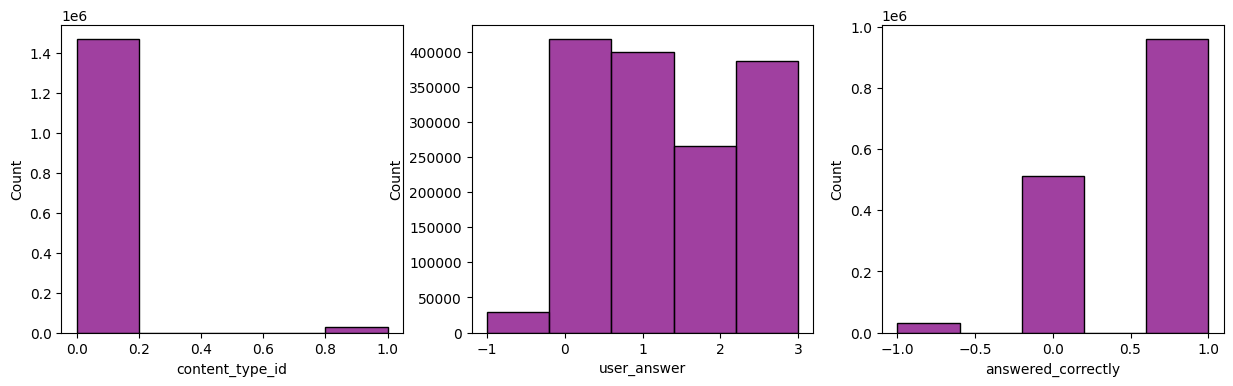

In [112]:
num_col_small = ['content_type_id', 'user_answer', 'answered_correctly']
width = 3
height = int(np.ceil(len(num_col_small) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (15, 4))

for idx, column_name in enumerate(num_col_small):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = df, x = column_name, bins = 5, color = 'purple')

In [113]:
df.isna().sum()

row_id                                0
timestamp                             0
user_id                               0
content_id                            0
content_type_id                       0
task_container_id                     0
user_answer                           0
answered_correctly                    0
prior_question_elapsed_time       35667
prior_question_had_explanation     5750
dtype: int64

In [114]:
df[df.prior_question_elapsed_time.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
89,89,653762,2746,6808,1,14,-1,-1,NaN,False
96,96,0,5382,5000,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1499060,1499060,4675035868,31566318,7008,1,4343,-1,-1,NaN,False
1499153,1499153,4767796153,31566318,24335,1,4391,-1,-1,NaN,False
1499230,1499230,4855040695,31566318,24558,1,4430,-1,-1,NaN,False
1499310,1499310,4943699956,31566318,16363,1,4456,-1,-1,NaN,False


In [115]:
df[df.prior_question_had_explanation.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
96,96,0,5382,5000,0,0,0,1,NaN,NaN
224,224,0,8623,3915,0,0,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1492180,1492180,0,31514265,4476,0,0,0,0,NaN,NaN
1492323,1492323,0,31526967,4848,0,0,0,1,NaN,NaN
1492626,1492626,0,31536921,4425,0,0,2,0,NaN,NaN
1492650,1492650,0,31563425,5685,0,0,2,1,NaN,NaN


In [116]:
df.duplicated().sum()

0

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1500000 non-null  int64  
 1   timestamp                       1500000 non-null  int64  
 2   user_id                         1500000 non-null  int64  
 3   content_id                      1500000 non-null  int64  
 4   content_type_id                 1500000 non-null  int64  
 5   task_container_id               1500000 non-null  int64  
 6   user_answer                     1500000 non-null  int64  
 7   answered_correctly              1500000 non-null  int64  
 8   prior_question_elapsed_time     1464333 non-null  float64
 9   prior_question_had_explanation  1494250 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 114.4+ MB


In [118]:
df = df.drop('row_id', axis = 1)
df['timestamp'] = df['timestamp'].astype('uint64')
df['user_id'] = df['user_id'].astype('uint32')
df['content_id'] = df['content_id'].astype('uint16')
df['content_type_id'] = df['content_type_id'].astype('int8')
df['task_container_id'] = df['task_container_id'].astype('uint16')
df['user_answer'] = df['user_answer'].astype('int8')
df['answered_correctly'] = df['answered_correctly'].astype('int8')
df['prior_question_elapsed_time'] = df['prior_question_elapsed_time'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   timestamp                       1500000 non-null  uint64 
 1   user_id                         1500000 non-null  uint32 
 2   content_id                      1500000 non-null  uint16 
 3   content_type_id                 1500000 non-null  int8   
 4   task_container_id               1500000 non-null  uint16 
 5   user_answer                     1500000 non-null  int8   
 6   answered_correctly              1500000 non-null  int8   
 7   prior_question_elapsed_time     1464333 non-null  float32
 8   prior_question_had_explanation  1494250 non-null  object 
dtypes: float32(1), int8(3), object(1), uint16(2), uint32(1), uint64(1)
memory usage: 44.3+ MB


In [119]:
# После очистки данных датафрейм занимает 44 Мб (было 114 Мб)

In [120]:
cm = sns.color_palette("vlag", as_cmap = True)
df_corr = df.loc[:,['timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time']]
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
timestamp,1.000000,-0.028015,0.041457,0.008534,0.375815,-0.002241,0.021893,0.018206
user_id,-0.028015,1.000000,-0.012670,0.002128,-0.026350,-0.000927,-0.000515,0.007701
content_id,0.041457,-0.012670,1.000000,0.420060,0.051465,-0.110519,-0.201972,0.153409
content_type_id,0.008534,0.002128,0.420060,1.000000,-0.010293,-0.283603,-0.440080,nan
task_container_id,0.375815,-0.026350,0.051465,-0.010293,1.000000,0.008820,0.046935,-0.030985
user_answer,-0.002241,-0.000927,-0.110519,-0.283603,0.008820,1.000000,0.127461,0.014551
answered_correctly,0.021893,-0.000515,-0.201972,-0.440080,0.046935,0.127461,1.000000,0.000644
prior_question_elapsed_time,0.018206,0.007701,0.153409,nan,-0.030985,0.014551,0.000644,1.000000


In [121]:
df_corr['cor_ratio'] = df_corr.answered_correctly / df_corr.user_answer
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,cor_ratio
timestamp,1.000000,-0.028015,0.041457,0.008534,0.375815,-0.002241,0.021893,0.018206,0.027825
user_id,-0.028015,1.000000,-0.012670,0.002128,-0.026350,-0.000927,-0.000515,0.007701,0.000709
content_id,0.041457,-0.012670,1.000000,0.420060,0.051465,-0.110519,-0.201972,0.153409,0.082783
content_type_id,0.008534,0.002128,0.420060,1.000000,-0.010293,-0.283603,-0.440080,nan,0.249284
task_container_id,0.375815,-0.026350,0.051465,-0.010293,1.000000,0.008820,0.046935,-0.030985,0.032993
user_answer,-0.002241,-0.000927,-0.110519,-0.283603,0.008820,1.000000,0.127461,0.014551,-0.528965
answered_correctly,0.021893,-0.000515,-0.201972,-0.440080,0.046935,0.127461,1.000000,0.000644,0.529504
prior_question_elapsed_time,0.018206,0.007701,0.153409,nan,-0.030985,0.014551,0.000644,1.000000,-0.009360
cor_ratio,0.027825,0.000709,0.082783,0.249284,0.032993,-0.528965,0.529504,-0.009360,1.000000


In [122]:
df_corr.drop(df_corr.columns[[0, 1, 2, 4, 7]], axis = 1, inplace = True)
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,content_type_id,user_answer,answered_correctly,cor_ratio
content_type_id,1.000000,-0.283603,-0.440080,0.249284
user_answer,-0.283603,1.000000,0.127461,-0.528965
answered_correctly,-0.440080,0.127461,1.000000,0.529504
cor_ratio,0.249284,-0.528965,0.529504,1.000000


<AxesSubplot: xlabel='cor_ratio', ylabel='Count'>

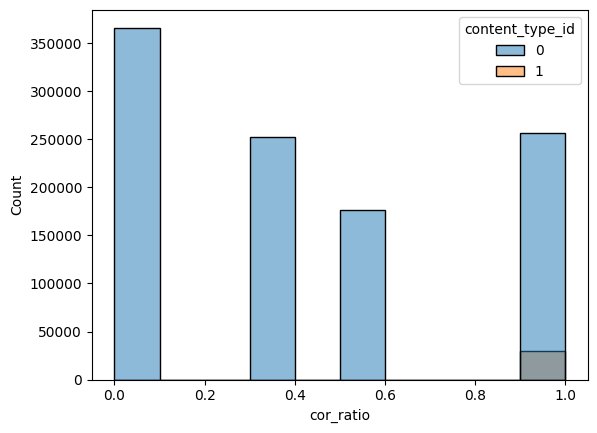

In [123]:
sns.histplot(data = df_corr, x = 'cor_ratio', hue = 'content_type_id', bins = 10)

In [124]:
df.agg({'user_id': pd.Series.nunique})

user_id    5760
dtype: int64

In [125]:
us_a = df[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()
us_a.head()

,user_id,user_answer,answered_correctly
0,115,72,32
1,124,49,7
2,2746,31,10
3,5382,169,81
4,8623,149,67


In [126]:
us_a.describe()

,user_id,user_answer,answered_correctly
count,5.760000e+03,5760.000000,5760.000000
mean,1.578159e+07,358.075694,161.333333
std,9.039642e+06,983.442162,466.164089
min,1.150000e+02,1.000000,-2.000000
25%,7.997718e+06,37.000000,11.000000
50%,1.571119e+07,60.000000,23.000000
75%,2.367266e+07,225.250000,97.000000
max,3.156632e+07,16907.000000,7613.000000


In [127]:
def rem_emission(df, col, k_std):
        mean = df[col].mean()
        std_o = df[col].std()
        return df[(df[col] <= mean + (k_std * std_o))]

us_a = rem_emission(us_a, 'user_answer', 1)
us_a['cor_ratio'] = us_a.answered_correctly / us_a.user_answer
us_a

,user_id,user_answer,answered_correctly,cor_ratio
0,115,72,32,0.444444
1,124,49,7,0.142857
2,2746,31,10,0.322581
3,5382,169,81,0.479290
4,8623,149,67,0.449664
...,...,...,...,...
5754,31500742,670,308,0.459701
5755,31514265,170,103,0.605882
5756,31526967,389,193,0.496144
5757,31536921,38,12,0.315789


In [128]:
us_a.describe()

,user_id,user_answer,answered_correctly,cor_ratio
count,5.406000e+03,5406.000000,5406.000000,5406.000000
mean,1.580327e+07,160.497780,68.812616,0.384298
std,9.035491e+06,237.949564,110.505299,0.132300
min,1.150000e+02,1.000000,-2.000000,-0.017241
25%,8.034505e+06,36.000000,11.000000,0.292683
50%,1.575568e+07,55.000000,21.000000,0.393075
75%,2.368764e+07,155.000000,67.000000,0.471360
max,3.156342e+07,1335.000000,759.000000,1.750000


In [129]:
a_per_user_med = us_a.user_answer.median()
print('Медианное значение количества ответов студентов: ', a_per_user_med)

Медианное значение количества ответов студентов:  55.0


<AxesSubplot: xlabel='user_answer', ylabel='Count'>

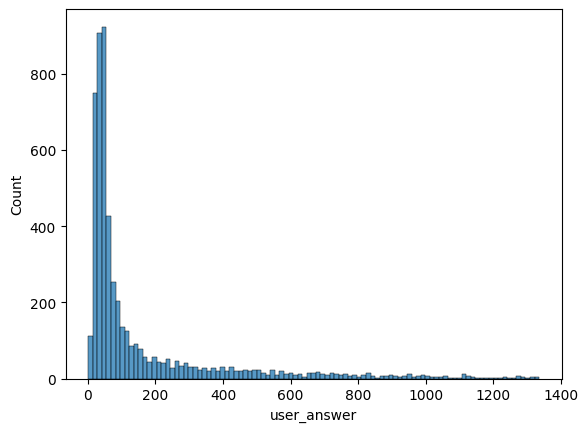

In [130]:
sns.histplot(data = us_a, x = 'user_answer')

<AxesSubplot: xlabel='user_answer', ylabel='Count'>

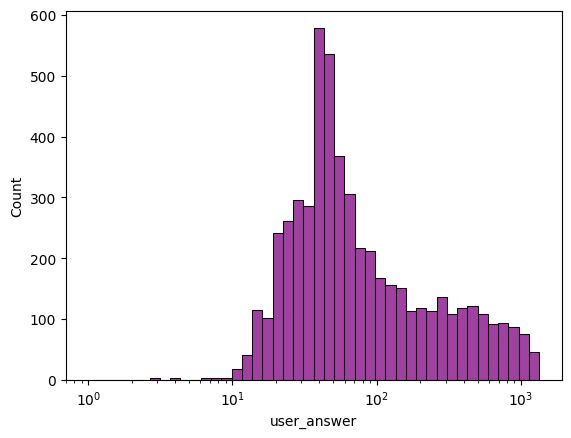

In [131]:
sns.histplot(data = us_a, x = 'user_answer', log_scale = True, color = 'purple')

0.43010752688172044


<AxesSubplot: >

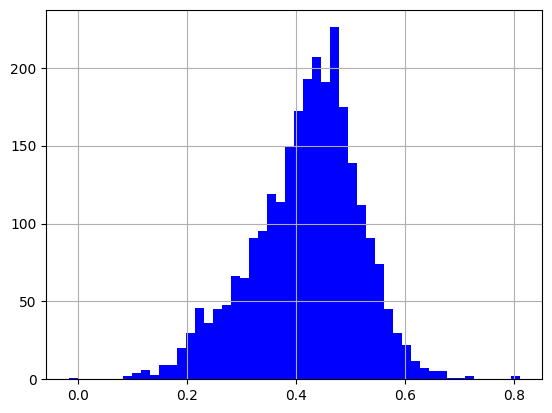

In [133]:
print(us_a.query('user_answer > 55')['cor_ratio'].median())
us_a.query('user_answer > 55')['cor_ratio'].hist(bins = 50, color = 'blue')

0.45052225002720053


<AxesSubplot: >

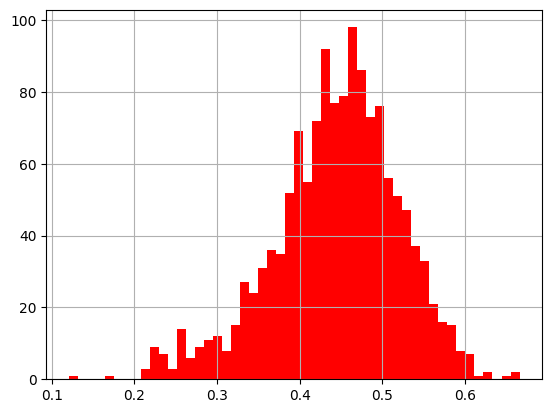

In [134]:
print(us_a.query('user_answer > 151')['cor_ratio'].median())
us_a.query('user_answer > 151')['cor_ratio'].hist(bins = 50, color = 'red')

0.456752655538695


<AxesSubplot: >

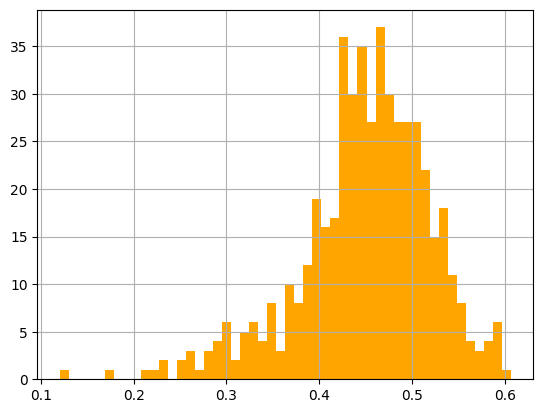

In [136]:
print(us_a.query('user_answer > 500')['cor_ratio'].median())
us_a.query('user_answer > 500')['cor_ratio'].hist(bins = 50, color = 'orange')

0.3333333333333333


<AxesSubplot: >

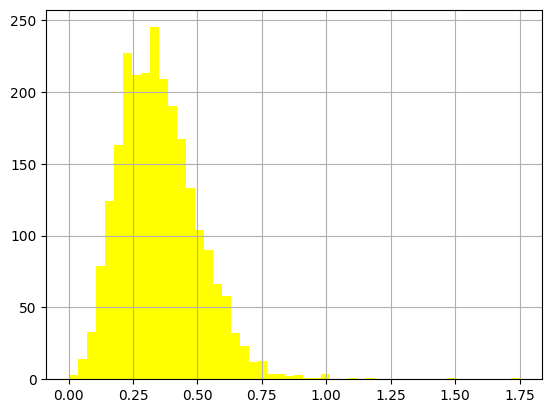

In [137]:
print(us_a.query('user_answer < 50')['cor_ratio'].median())
us_a.query('user_answer < 50')['cor_ratio'].hist(bins = 50, color = 'yellow')

In [138]:
corr_look = df[['user_id', 'user_answer', 'answered_correctly', 'timestamp', \
    'prior_question_elapsed_time']].groupby(['user_id'], as_index = False).sum()
corr_look['timestamp_ratio'] = corr_look['timestamp'] / corr_look['user_answer']
corr_look['elapsed_time_ratio'] = corr_look['prior_question_elapsed_time'] / corr_look['user_answer']
corr_look['cor_ratio'] = corr_look.answered_correctly / corr_look.user_answer
corr_look.drop(corr_look.columns[[0, 2, 3, 4]], axis = 1, inplace = True)
corr_look = rem_emission(corr_look, 'user_answer', 1)
corr_look

,user_answer,timestamp_ratio,elapsed_time_ratio,cor_ratio
0,72,6.524638e+07,12458.319444,0.444444
1,49,2.252203e+05,11122.387755,0.142857
2,31,2.472123e+05,10483.870968,0.322581
3,169,2.879101e+08,26449.704142,0.479290
4,149,2.615750e+08,18923.489933,0.449664
...,...,...,...,...
5754,670,7.400699e+08,13309.200000,0.459701
5755,170,1.484667e+08,20560.976471,0.605882
5756,389,1.580026e+09,18931.089974,0.496144
5757,38,4.576848e+07,15421.052632,0.315789


<AxesSubplot: xlabel='user_answer', ylabel='timestamp_ratio'>

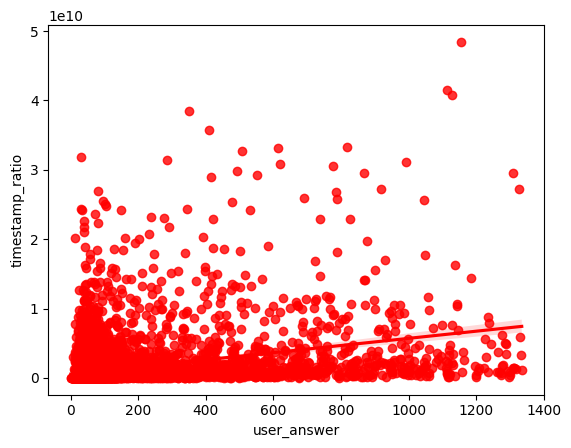

In [140]:
sns.regplot(data = corr_look, x = 'user_answer', y = 'timestamp_ratio', color = 'red')

<AxesSubplot: xlabel='user_answer', ylabel='elapsed_time_ratio'>

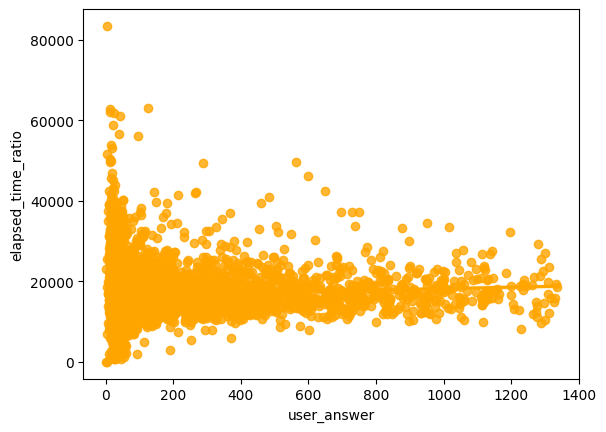

In [141]:
sns.regplot(data = corr_look, x = 'user_answer', y = 'elapsed_time_ratio', color = 'orange')

<AxesSubplot: xlabel='timestamp_ratio', ylabel='cor_ratio'>

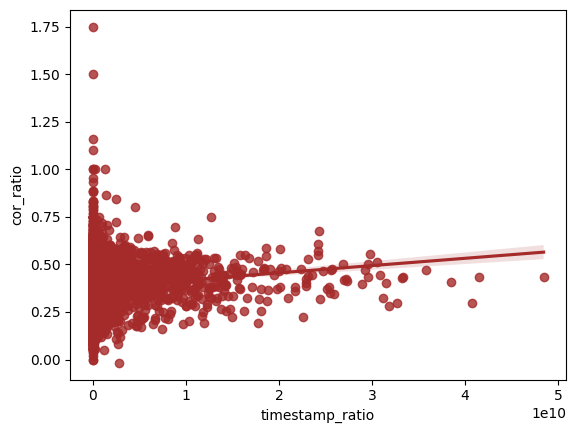

In [142]:
sns.regplot(data = corr_look, x = 'timestamp_ratio', y = 'cor_ratio', color = 'brown')

<AxesSubplot: xlabel='elapsed_time_ratio', ylabel='cor_ratio'>

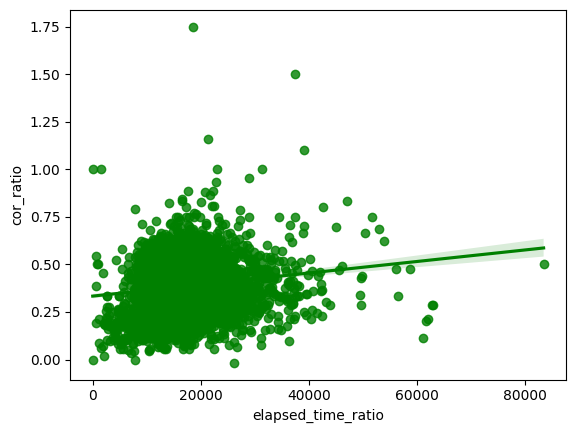

In [143]:
sns.regplot(data = corr_look, x = 'elapsed_time_ratio', y = 'cor_ratio', color = 'green')

## На успеваемость студентов влияют следующие характеристики:
- количество ответов студентов, большее медианного значения количества ответов, равного 55
- типа контента (вопрос или лекция) - очень слабо
- соотношения количества правильных ответов и среднего времени ответа на каждый вопрос к общему количеству ответов студентов - слабо